In [1]:
from sparsity_util import read_sparsity_info
import numpy as np

# Check Fused + Pruned State_dict

In [2]:
import torch

pth = torch.load('../resnet18_structed_by_half/pruned_state_dict.pth')

In [3]:
print(pth.keys())

odict_keys(['conv1.bias', 'conv1.weight_orig', 'conv1.weight_mask', 'layer1.0.conv1.weight', 'layer1.0.conv1.bias', 'layer1.0.conv2.weight', 'layer1.0.conv2.bias', 'layer1.1.conv1.weight', 'layer1.1.conv1.bias', 'layer1.1.conv2.weight', 'layer1.1.conv2.bias', 'layer2.0.conv1.weight', 'layer2.0.conv1.bias', 'layer2.0.conv2.weight', 'layer2.0.conv2.bias', 'layer2.0.downsample.0.weight', 'layer2.0.downsample.0.bias', 'layer2.1.conv1.weight', 'layer2.1.conv1.bias', 'layer2.1.conv2.weight', 'layer2.1.conv2.bias', 'layer3.0.conv1.weight', 'layer3.0.conv1.bias', 'layer3.0.conv2.weight', 'layer3.0.conv2.bias', 'layer3.0.downsample.0.weight', 'layer3.0.downsample.0.bias', 'layer3.1.conv1.weight', 'layer3.1.conv1.bias', 'layer3.1.conv2.weight', 'layer3.1.conv2.bias', 'layer4.0.conv1.weight', 'layer4.0.conv1.bias', 'layer4.0.conv2.weight', 'layer4.0.conv2.bias', 'layer4.0.downsample.0.weight', 'layer4.0.downsample.0.bias', 'layer4.1.conv1.weight', 'layer4.1.conv1.bias', 'layer4.1.conv2.weight', '

In [4]:
mask = pth['conv1.weight_mask']
print(mask.shape)
mask2 = mask.to(int).sum((1,2,3))
mask2

torch.Size([64, 3, 7, 7])


tensor([147, 147,   0, 147,   0, 147, 147,   0, 147,   0, 147, 147, 147,   0,
        147, 147, 147,   0, 147,   0, 147,   0, 147, 147, 147, 147, 147, 147,
        147, 147, 147, 147,   0, 147, 147, 147,   0,   0,   0, 147, 147, 147,
        147, 147, 147,   0,   0, 147,   0, 147, 147, 147, 147, 147,   0, 147,
        147,   0, 147, 147, 147,   0,   0, 147])

# Read SparsityInfo from file

In [5]:
b2 = read_sparsity_info('../resnet18_structed_by_half/stem_bn_act')
# b1 = read_sparsity_info('../resnet18_fused_l1unstructed_by_half/layer2_b0__act9')
b = read_sparsity_info('../resnet18_unpruned/stem_bn_act')
print('strcutured pruned:' + str(np.average(b2.avg)))
# print('unstructured pruned:' + str(np.average(b1.avg)))
print('unpruned:' + str(np.average(b.avg)))

strcutured pruned:0.3030362615779954
unpruned:0.29525908061436235


In [6]:
b.batch_count

1280

# Visualize

In [7]:
%matplotlib widget

from sparsity_util import SparsityMap3D, SparsityMap2D, SparsityMap1D

In [8]:
b_map = SparsityMap3D(b.avg)

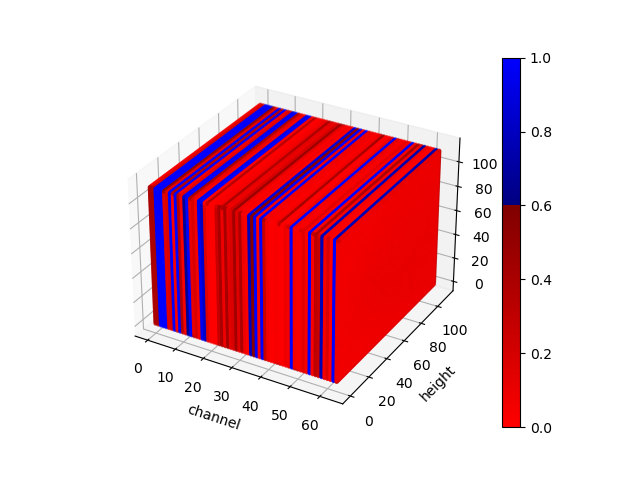

Figure(640x480)


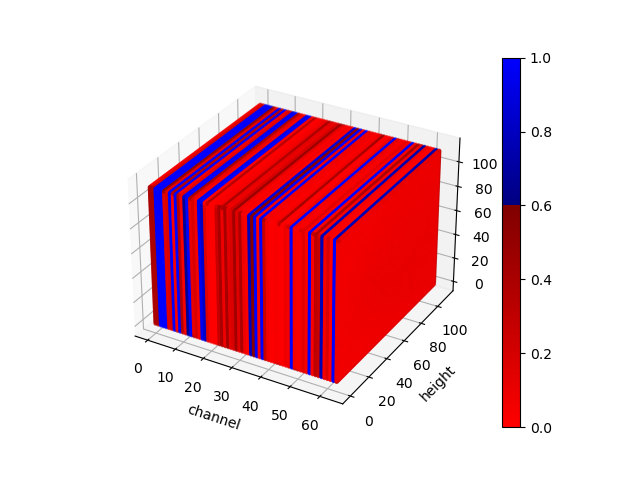

In [9]:
x = b_map.draw()
print(x)

In [10]:
bc = SparsityMap1D(b.group_by('channel').avg, labels=['channel'])

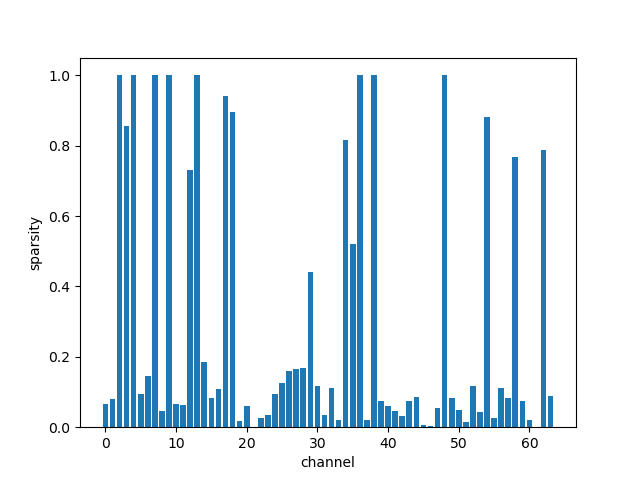

1


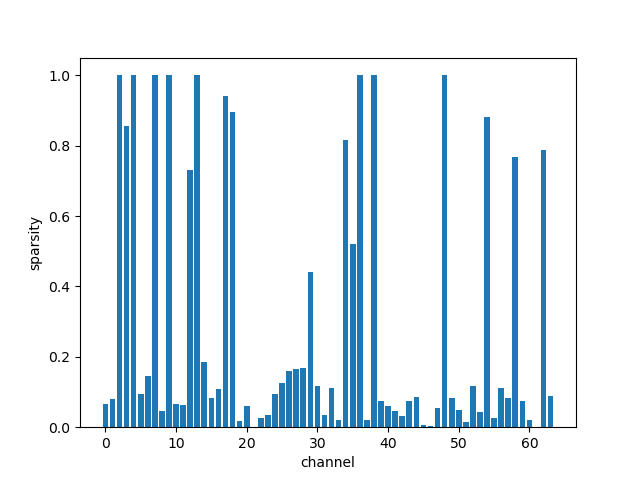

In [11]:
_ = bc.draw()
print('1')

# Sparsity Data on Channels

In [12]:
channel_avg1 = SparsityMap1D(b.slice_batch(0,128).group_by('channel').avg)
channel_avg2 = SparsityMap1D(b2.slice_batch(128,256).group_by('channel').avg)

In [13]:
channel_avg1.sparsity_tensor

array([6.02628747e-02, 6.65357940e-02, 1.00000000e+00, 8.17981331e-01,
       1.00000000e+00, 1.04495302e-01, 1.74448441e-01, 1.00000000e+00,
       4.09128617e-02, 1.00000000e+00, 5.77654157e-02, 5.29479980e-02,
       6.99409952e-01, 1.00000000e+00, 1.64839764e-01, 9.75024165e-02,
       1.27009801e-01, 9.42757743e-01, 9.31905318e-01, 1.42130949e-02,
       4.78496941e-02, 9.20509805e-04, 1.95804518e-02, 4.01985013e-02,
       8.74945193e-02, 1.04393161e-01, 1.46164875e-01, 2.37758092e-01,
       2.20543063e-01, 3.85003538e-01, 1.06759208e-01, 4.35099699e-02,
       1.81739651e-01, 5.07569605e-02, 8.13431098e-01, 4.99699184e-01,
       1.00000000e+00, 1.15020129e-02, 1.00000000e+00, 6.90307617e-02,
       5.87500747e-02, 3.88575963e-02, 2.65515386e-02, 6.26974300e-02,
       7.27694764e-02, 2.65901527e-02, 3.53692502e-03, 4.80981944e-02,
       1.00000000e+00, 7.12803432e-02, 4.63524643e-02, 1.08088279e-02,
       1.36151995e-01, 3.96647551e-02, 8.47488715e-01, 2.38348513e-02,
      

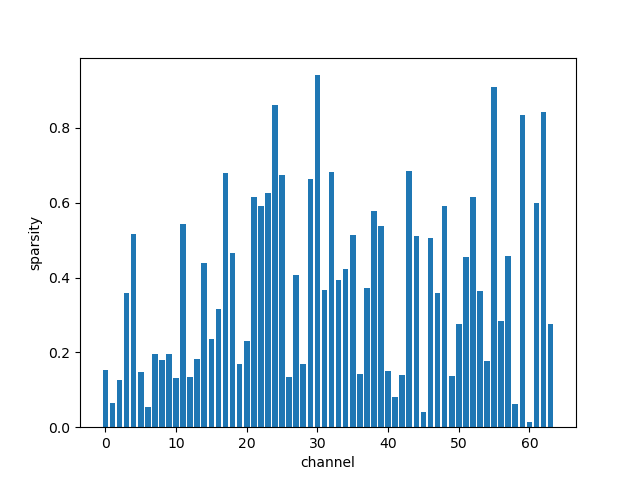

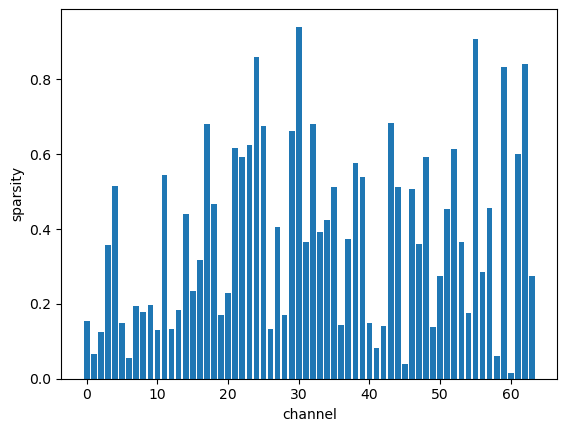

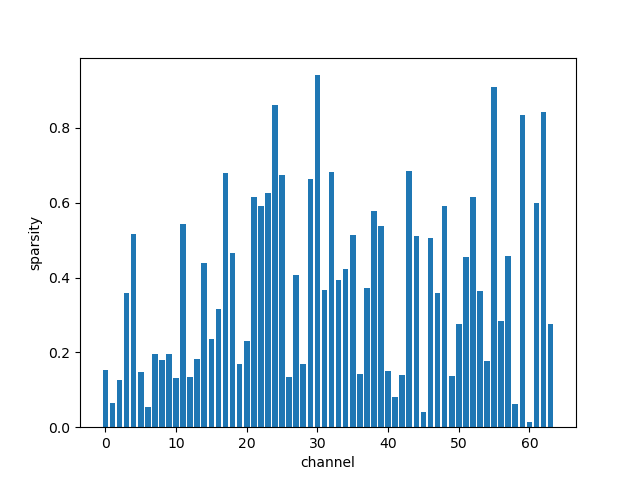

In [26]:
channel_avg1.draw()

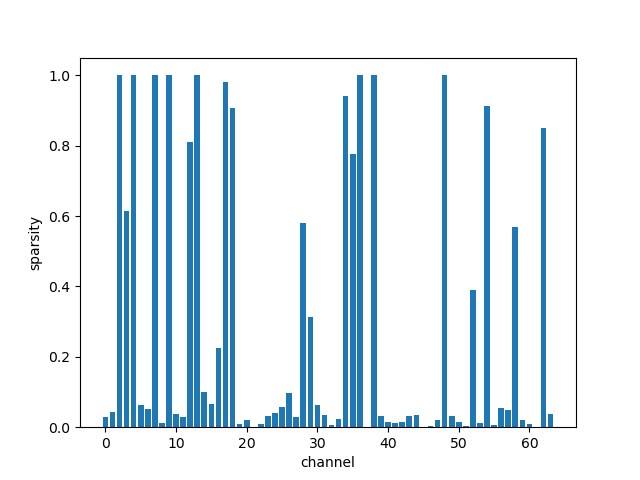

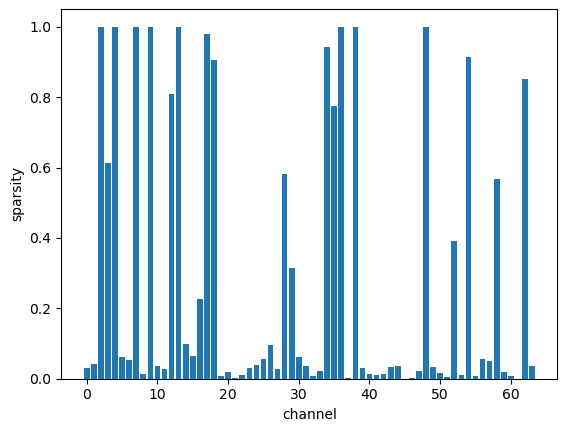

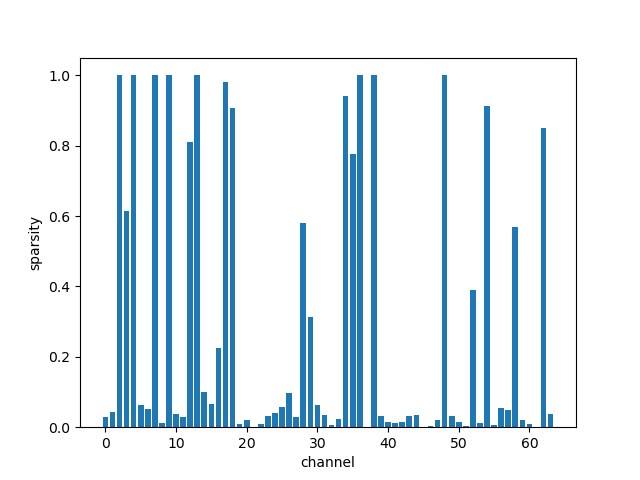

In [14]:
channel_avg2.draw()

# Bar chart on channel dim

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

def bar_chart(avg, std_var, labels=['channel']):
    avg = avg.flatten()
    std_var = std_var.flatten()
    
    fig, ax = plt.subplots()
    x_pos = range(len(avg))
    labels = map(lambda x: str(x), x_pos)
    
    ax.bar(x_pos, avg, yerr=std_var, align='center', alpha=0.5, ecolor='black', capsize=3)
    ax.set_ylabel('Sparsity')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    
    plt.show()

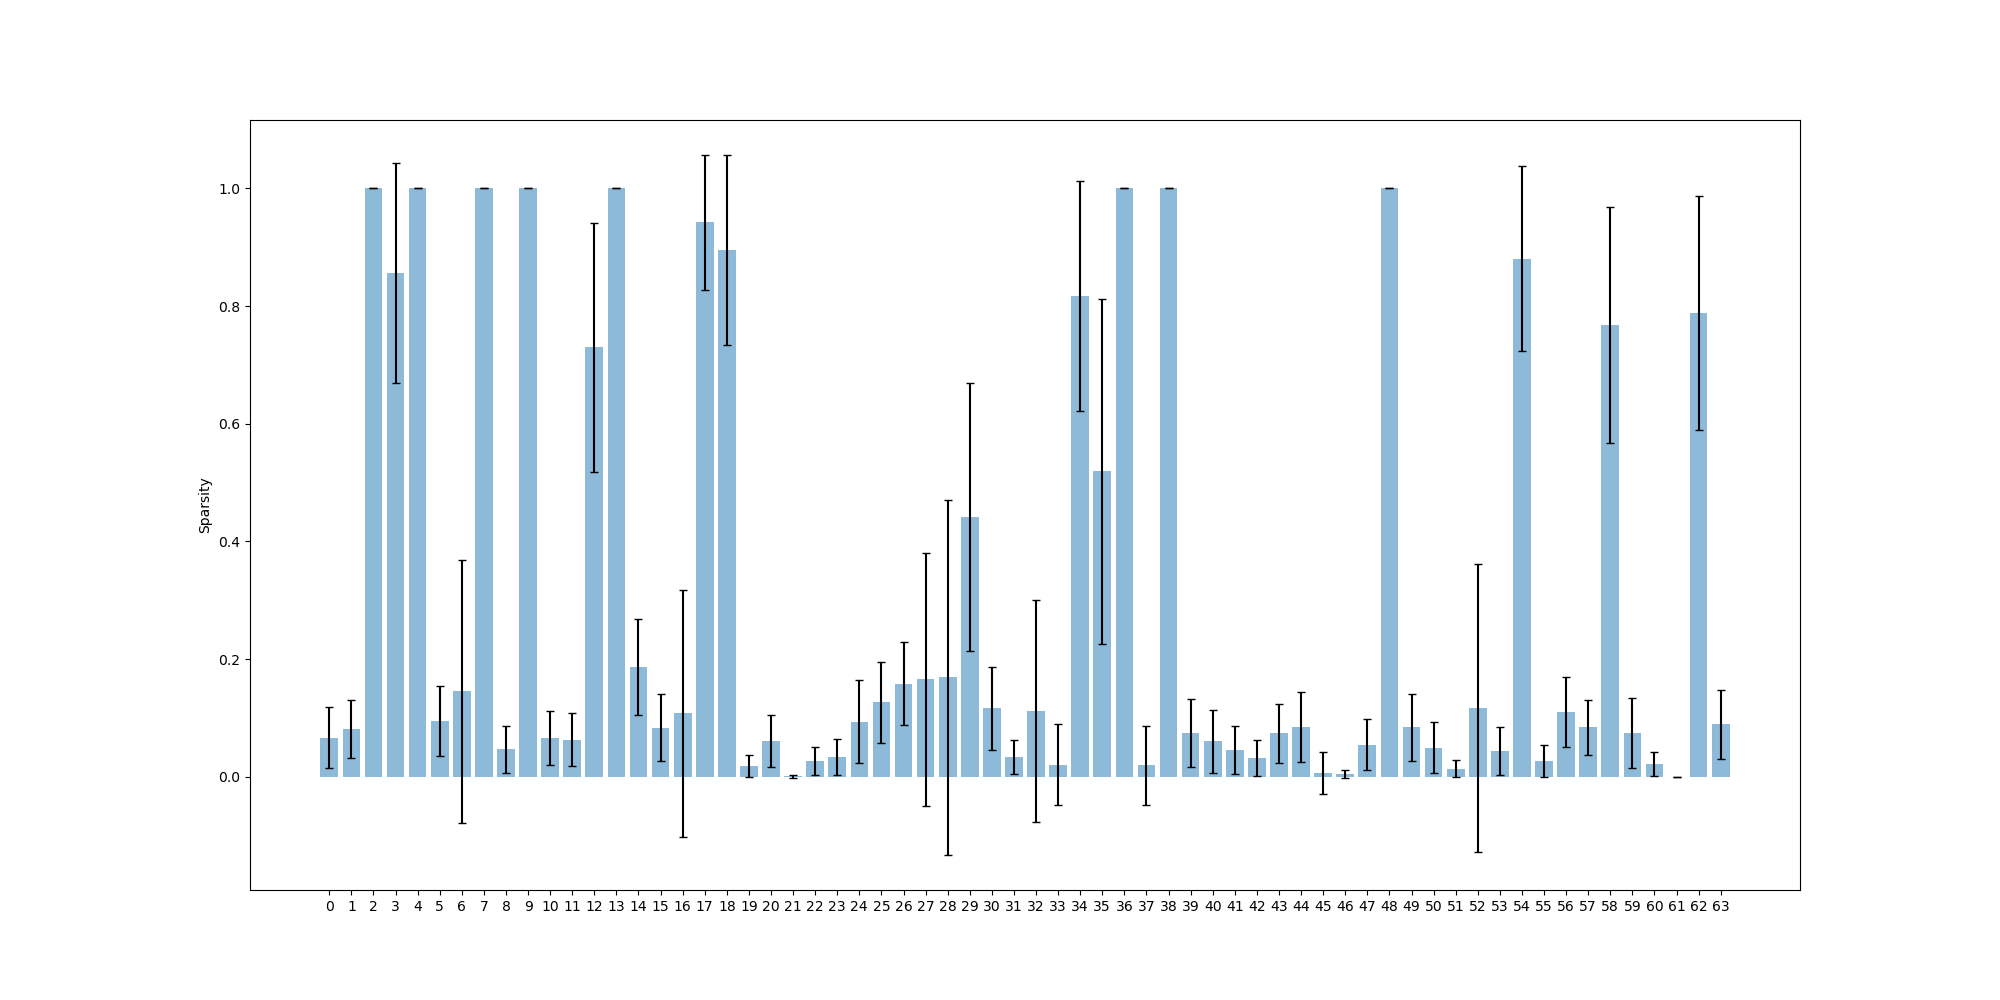

In [16]:
bar_chart(b.group_by('channel').avg, b.group_by('channel').std_var)

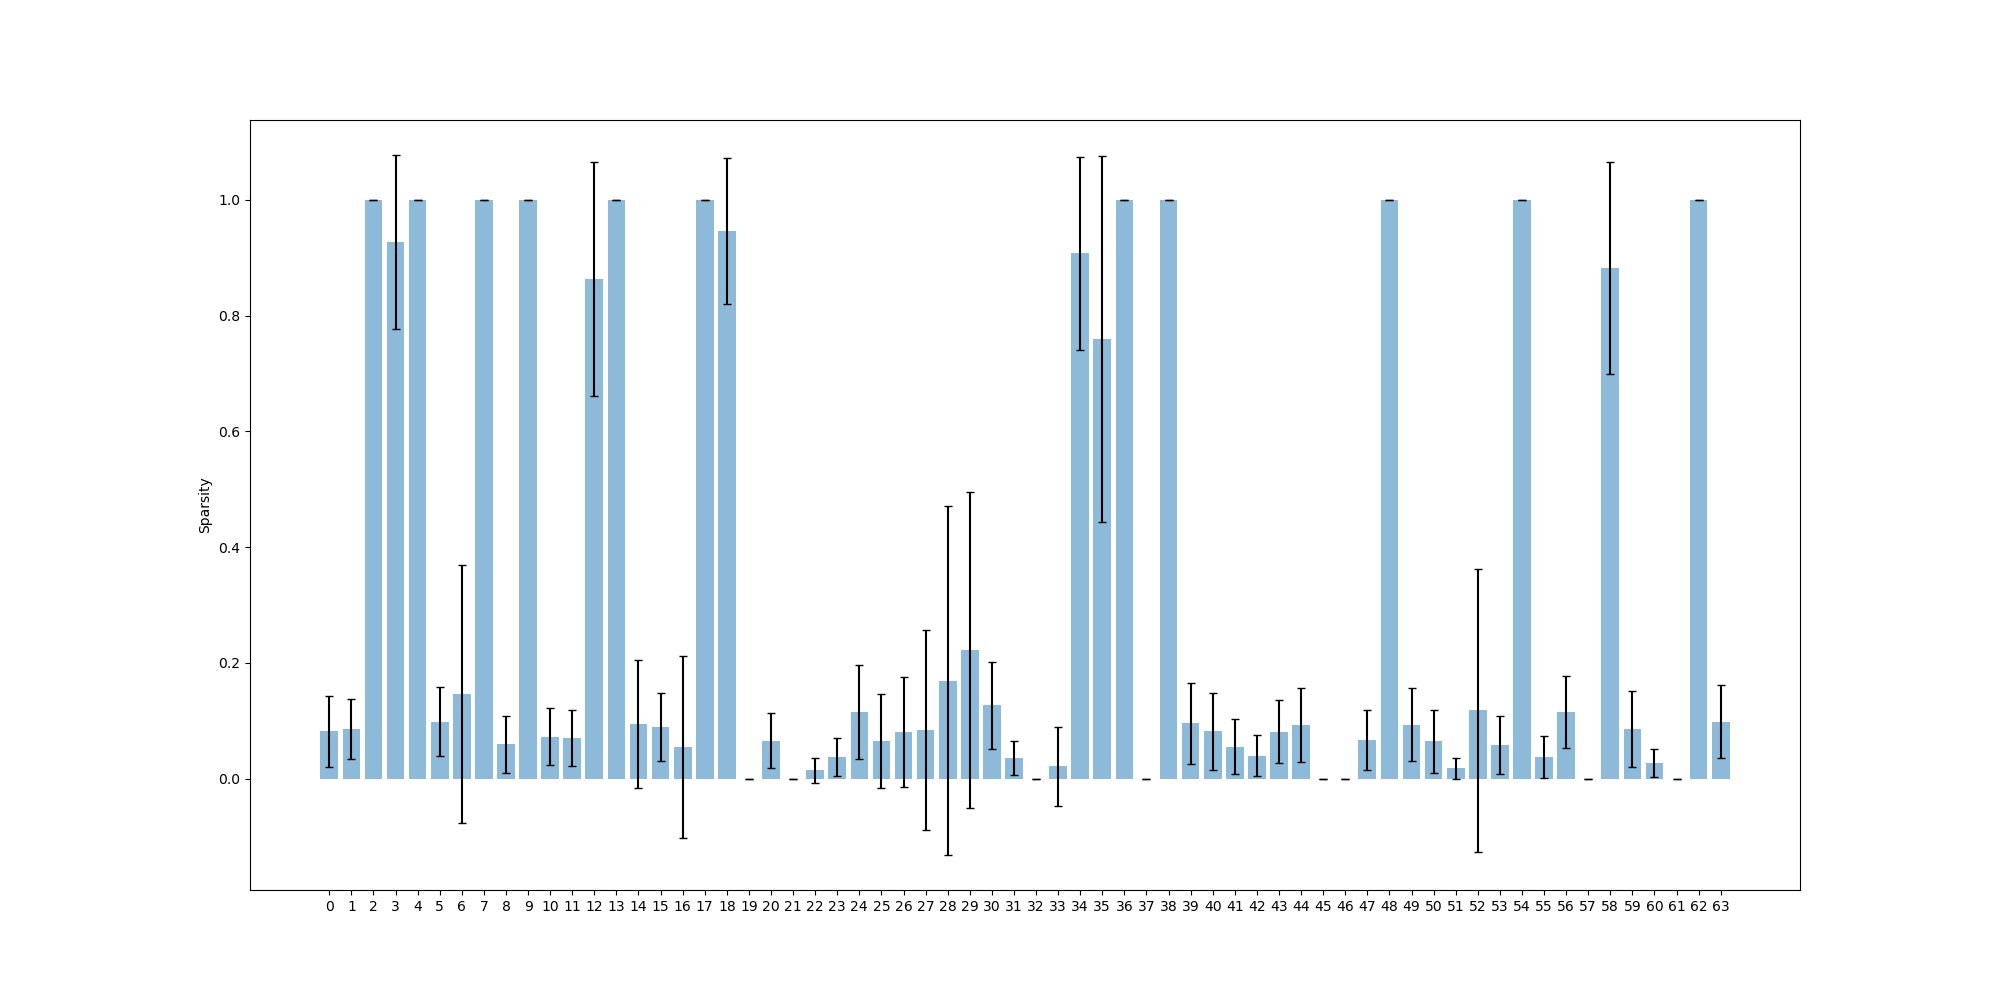

In [17]:
bar_chart(b2.group_by('channel').avg, b2.group_by('channel').std_var)